In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


classification_data = pd.read_csv('data/bodyPerformance.csv')
regression_data = pd.read_csv('data/UsedCars_Combined.csv')

## Data Analysis

In [2]:
classification_data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
regression_data.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai


As seen we have some data that needs to be changed and dropped like the "Id" column.

## Data Cleaning

In [4]:
regression_data.drop('Id', axis=1, inplace=True)
regression_data.head()

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

regression_data = regression_data.apply(le.fit_transform)
classification_data = classification_data.apply(le.fit_transform)
regression_data.head()

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,13,7,131,28,66,44,3,9
1,9,23,570,129,42,602,1,9
2,14,28,676,69,308,440,1,14
3,14,21,526,51,349,157,1,9
4,9,8,259,144,78,145,1,9


Now for the future models to do the calculations and other stuff, we labelized all the columns.

## Hyperparameter Tuning

# KNN

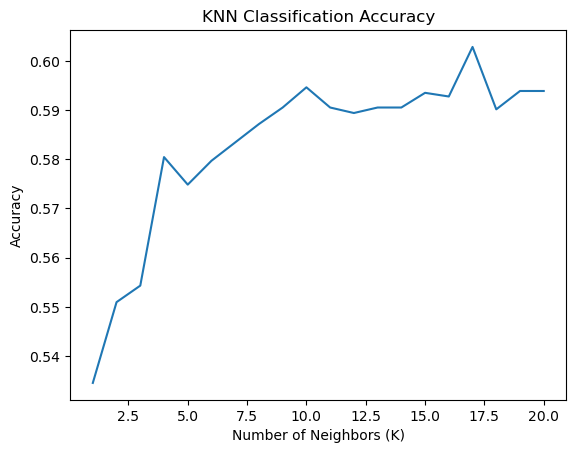

In [6]:
X_class = classification_data.drop('class', axis=1)
y_class = classification_data['class']

k_values = range(1, 21)  
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Classification Accuracy')
plt.show()

Wee see that the optimal nr. of neighbors (K) for KNN is 17.5. If further, the accuracy lowers

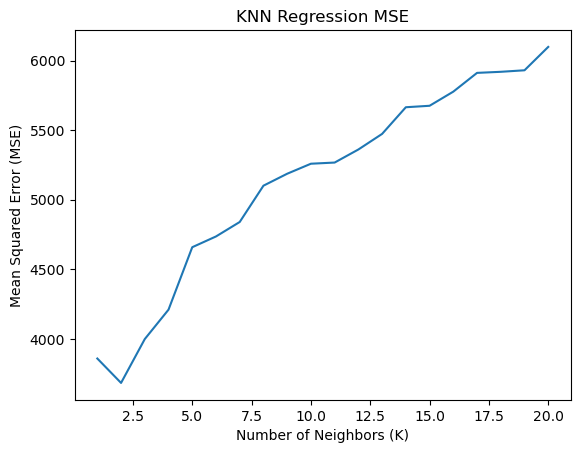

In [19]:
X_reg = regression_data.drop('price', axis=1) 
y_reg = regression_data['price']

mse_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.plot(k_values, mse_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Regression MSE')
plt.show()

A more fatal situation is when speaking about KNN Regression, because the more K, the more error. The optimal k nr is 2.

## Decision Tree

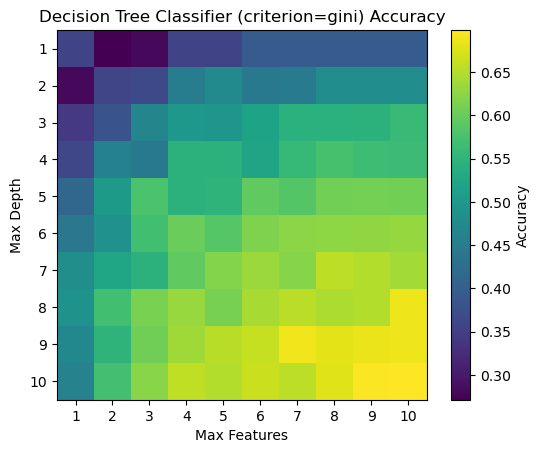

In [8]:
max_depth_values = range(1, 11) 
max_features_values = range(1, len(classification_data.columns)-1)  
accuracy_matrix_gini = np.zeros((len(max_depth_values), len(max_features_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_features in enumerate(max_features_values):
        dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, max_features=max_features)
        X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
        dt_classifier.fit(X_train, y_train)
        y_pred = dt_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_matrix_gini[i, j] = accuracy

plt.imshow(accuracy_matrix_gini, cmap='viridis')
plt.colorbar(label='Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.title('Decision Tree Classifier (criterion=gini) Accuracy')
plt.xticks(range(len(max_features_values)), max_features_values)
plt.yticks(range(len(max_depth_values)), max_depth_values)
plt.show()

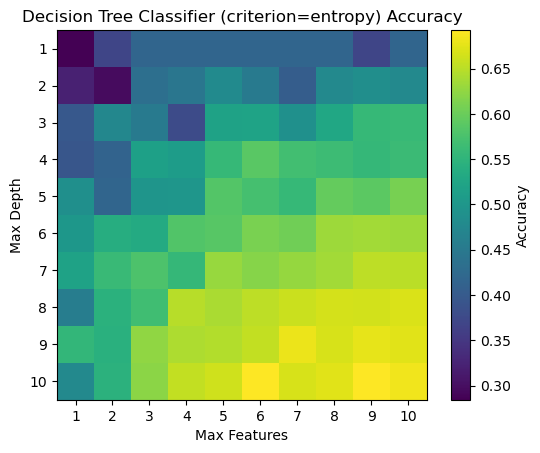

In [9]:
accuracy_matrix_entropy = np.zeros((len(max_depth_values), len(max_features_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_features in enumerate(max_features_values):
        dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_features=max_features)
        X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
        dt_classifier.fit(X_train, y_train)
        y_pred = dt_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_matrix_entropy[i, j] = accuracy

plt.imshow(accuracy_matrix_entropy, cmap='viridis')
plt.colorbar(label='Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.title('Decision Tree Classifier (criterion=entropy) Accuracy')
plt.xticks(range(len(max_features_values)), max_features_values)
plt.yticks(range(len(max_depth_values)), max_depth_values)
plt.show()

Lets compare gini with entropy. As we can see, GINI performs better, because the accuracy grows as Max Depth and Max Features grow, however in case of gini, accuracy is better

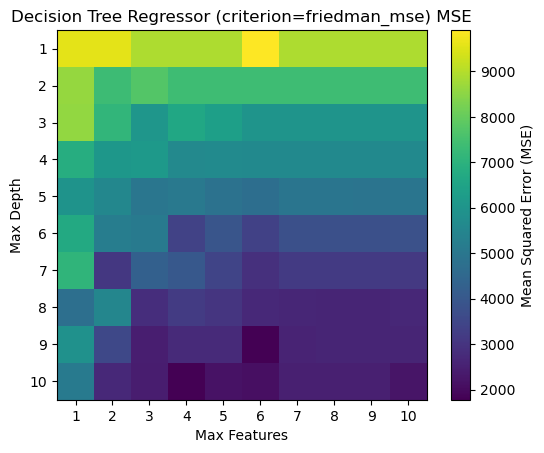

In [10]:
mse_matrix_friedman_mse = np.zeros((len(max_depth_values), len(max_features_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_features in enumerate(max_features_values):
        dt_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=max_depth, max_features=max_features)
        X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
        dt_regressor.fit(X_train, y_train)
        y_pred = dt_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_matrix_friedman_mse[i, j] = mse

plt.imshow(mse_matrix_friedman_mse, cmap='viridis')
plt.colorbar(label='Mean Squared Error (MSE)')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.title('Decision Tree Regressor (criterion=friedman_mse) MSE')
plt.xticks(range(len(max_features_values)), max_features_values)
plt.yticks(range(len(max_depth_values)), max_depth_values)
plt.show()

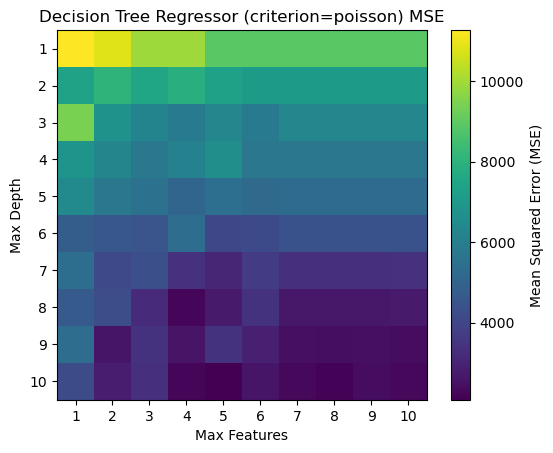

In [11]:
mse_matrix_poisson = np.zeros((len(max_depth_values), len(max_features_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_features in enumerate(max_features_values):
        dt_regressor = DecisionTreeRegressor(criterion='poisson', max_depth=max_depth, max_features=max_features)
        X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
        dt_regressor.fit(X_train, y_train)
        y_pred = dt_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_matrix_poisson[i, j] = mse

plt.imshow(mse_matrix_poisson, cmap='viridis')
plt.colorbar(label='Mean Squared Error (MSE)')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.title('Decision Tree Regressor (criterion=poisson) MSE')
plt.xticks(range(len(max_features_values)), max_features_values)
plt.yticks(range(len(max_depth_values)), max_depth_values)
plt.show()

Now if we compare the poisson and friedman_mse criterion in case of Decision Tree Regressor, the perform relatively the same.

## Random Forest

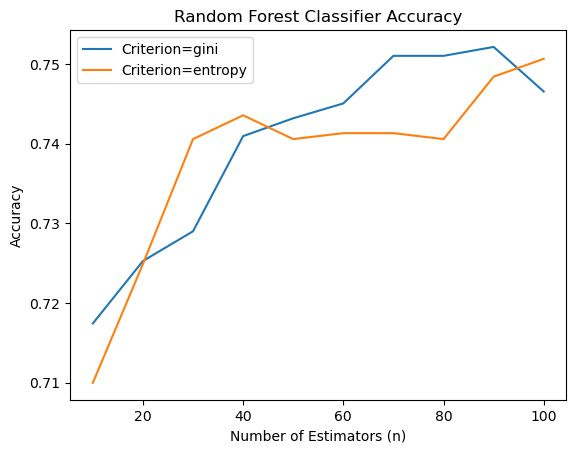

In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
n_estimators_values = range(10, 101, 10)  
accuracy_scores_gini = []
accuracy_scores_entropy = []

for n_estimators in n_estimators_values:
    rf_classifier_gini = RandomForestClassifier(criterion='gini', n_estimators=n_estimators, random_state=42)
    rf_classifier_entropy = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    
    rf_classifier_gini.fit(X_train, y_train)
    y_pred_gini = rf_classifier_gini.predict(X_test)
    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    accuracy_scores_gini.append(accuracy_gini)
    
    rf_classifier_entropy.fit(X_train, y_train)
    y_pred_entropy = rf_classifier_entropy.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
    accuracy_scores_entropy.append(accuracy_entropy)

plt.plot(n_estimators_values, accuracy_scores_gini, label='Criterion=gini')
plt.plot(n_estimators_values, accuracy_scores_entropy, label='Criterion=entropy')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.legend()
plt.show()

If we speaking about Random Forest Classifier, we can see that on 80 nr. of estimators , gini gives the best accuracy, however, when the estimators raise to 100, entropy takes over.

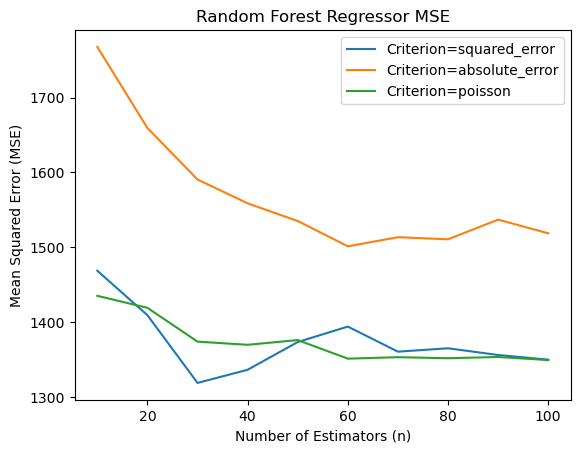

In [14]:
mse_scores_squared_error = []
mse_scores_absolute_error = []
mse_scores_poisson = []

for n_estimators in n_estimators_values:
    rf_regressor_squared_error = RandomForestRegressor(criterion='squared_error', n_estimators=n_estimators, random_state=42)
    rf_regressor_absolute_error = RandomForestRegressor(criterion='absolute_error', n_estimators=n_estimators, random_state=42)
    rf_regressor_poisson = RandomForestRegressor(criterion='poisson', n_estimators=n_estimators, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    
    rf_regressor_squared_error.fit(X_train, y_train)
    y_pred_squared_error = rf_regressor_squared_error.predict(X_test)
    mse_squared_error = mean_squared_error(y_test, y_pred_squared_error)
    mse_scores_squared_error.append(mse_squared_error)
    
    rf_regressor_absolute_error.fit(X_train, y_train)
    y_pred_absolute_error = rf_regressor_absolute_error.predict(X_test)
    mse_absolute_error = mean_squared_error(y_test, y_pred_absolute_error)
    mse_scores_absolute_error.append(mse_absolute_error)
    
    rf_regressor_poisson.fit(X_train, y_train)
    y_pred_poisson = rf_regressor_poisson.predict(X_test)
    mse_poisson = mean_squared_error(y_test, y_pred_poisson)
    mse_scores_poisson.append(mse_poisson)

plt.plot(n_estimators_values, mse_scores_squared_error, label='Criterion=squared_error')
plt.plot(n_estimators_values, mse_scores_absolute_error, label='Criterion=absolute_error')
plt.plot(n_estimators_values, mse_scores_poisson, label='Criterion=poisson')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Random Forest Regressor MSE')
plt.legend()
plt.show()


Now lets talk about the total accuracy and the nr. of estimators. Here we can see that as the nr of estimator rises, the absolute_error downs significantly. Even if squared_error and poisson is lower, raising the nr. of estimators gives a pretty good effect

# SVC and SVR

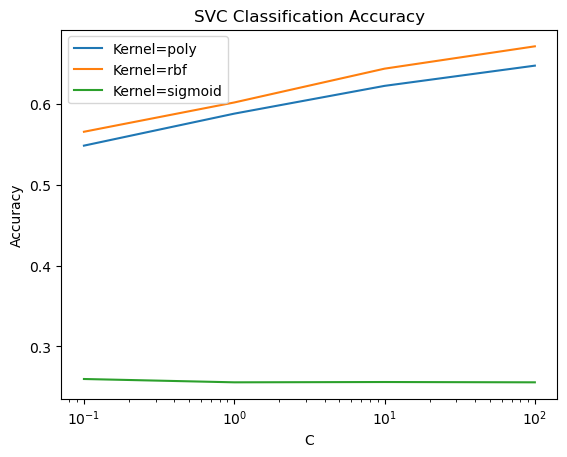

In [15]:
C_values = [0.1, 1, 10, 100]
accuracy_scores_poly = []
accuracy_scores_rbf = []
accuracy_scores_sigmoid = []

for C in C_values:
    svc_poly = SVC(kernel='poly', C=C)
    svc_rbf = SVC(kernel='rbf', C=C)
    svc_sigmoid = SVC(kernel='sigmoid', C=C)
    
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    
    svc_poly.fit(X_train, y_train)
    y_pred_poly = svc_poly.predict(X_test)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)
    accuracy_scores_poly.append(accuracy_poly)
    
    svc_rbf.fit(X_train, y_train)
    y_pred_rbf = svc_rbf.predict(X_test)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    accuracy_scores_rbf.append(accuracy_rbf)
    
    svc_sigmoid.fit(X_train, y_train)
    y_pred_sigmoid = svc_sigmoid.predict(X_test)
    accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
    accuracy_scores_sigmoid.append(accuracy_sigmoid)

plt.plot(C_values, accuracy_scores_poly, label='Kernel=poly')
plt.plot(C_values, accuracy_scores_rbf, label='Kernel=rbf')
plt.plot(C_values, accuracy_scores_sigmoid, label='Kernel=sigmoid')
plt.xlabel('C')
plt.xscale('log') 
plt.ylabel('Accuracy')
plt.title('SVC Classification Accuracy')
plt.legend()
plt.show()

In the case of SVC, we can find out that the best kernel to use is the rbf one as it is initially the top one, and it raises as the C parameter raises.

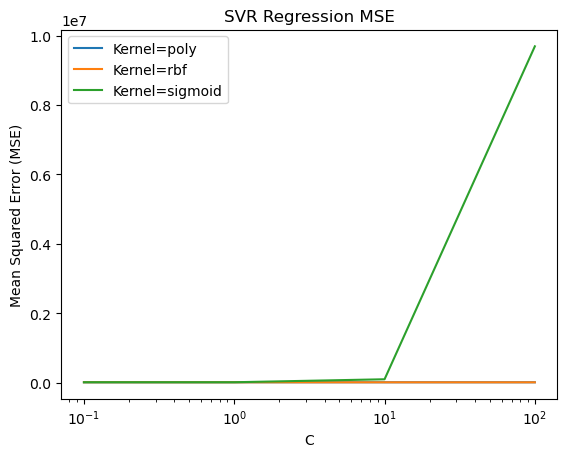

In [16]:
mse_scores_poly = []
mse_scores_rbf = []
mse_scores_sigmoid = []

for C in C_values:
    svr_poly = SVR(kernel='poly', C=C)
    svr_rbf = SVR(kernel='rbf', C=C)
    svr_sigmoid = SVR(kernel='sigmoid', C=C)
    
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    
    svr_poly.fit(X_train, y_train)
    y_pred_poly = svr_poly.predict(X_test)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_scores_poly.append(mse_poly)
    
    svr_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_rbf.predict(X_test)
    mse_rbf = mean_squared_error(y_test, y_pred_rbf)
    mse_scores_rbf.append(mse_rbf)
    
    svr_sigmoid.fit(X_train, y_train)
    y_pred_sigmoid = svr_sigmoid.predict(X_test)
    mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
    mse_scores_sigmoid.append(mse_sigmoid)

plt.plot(C_values, mse_scores_poly, label='Kernel=poly')
plt.plot(C_values, mse_scores_rbf, label='Kernel=rbf')
plt.plot(C_values, mse_scores_sigmoid, label='Kernel=sigmoid')
plt.xlabel('C')
plt.xscale('log')  
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SVR Regression MSE')
plt.legend()
plt.show()

The same result we get when talking about SVR. The rbf and poly stay at the same level constantly, while the sigmoid kernel raises the MSE when C=10^1